Cleaned up version of the other MCMC notebooks where you try to fit an optimal sigma

In [7]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import scipy
import scipy.stats as st
import time
import scipy.special as spec


In [40]:
np.random.seed(0)
means = [2,6,6, 8,8,10, 2, 4, 6, 8, 5, 3, 7, 8, 3, 2,8,3,2,9,6,4,2,1,1, 6, 5, 9,3 ]
sigma = 7
#draw two samples from a guassian with the above means and sigma
samples = np.zeros((len(means), 2))
for i, mean in enumerate(means):
    samples[i] = np.random.normal(mean, sigma, 2)

#print samples

In [41]:
sigma_range = np.linspace(1, 10, 100)

def fit_sigma(log_times, sigma_range):
    prob = np.zeros(( sigma_range.shape[0], log_times.shape[0])) # include area for each gaussia
    start = time.time()

    for j, sigma in enumerate(sigma_range):
        for i, val in enumerate(log_times):
            #prob[j][i] =#-np.log(2*np.pi) - np.log(sigma**2) -1./(2*sigam**2)*np.sum() 
            prob[j][i]=-(val[0] - val[1])**2/(4. *sigma**2) +np.log(1+spec.erf(np.nansum(val)/(2.*sigma))) - np.log(4*np.pi**0.5*sigma)

        #print j
    end = time.time()
    print "Time", (end -start)
    return prob
probs = fit_sigma(samples, sigma_range)
#print probs

Time 0.084349155426


In [42]:
#see how the areas change as sigma changes
def sigma_prob_sum(prob):
    summed_prob = np.zeros(prob.shape[0])
    print summed_prob.shape, prob.shape
    for  i, val in enumerate(prob):
           summed_prob[i] = np.average(val)

    return summed_prob
    

summed_Areas2= sigma_prob_sum(probs)
#print summed_Areas2
ind = np.where(summed_Areas2.max() == summed_Areas2)
print sigma_range[ind[0][0]]

(100,) (100, 29)
7.54545454545


In [81]:
# try with a much larger samples set
size = 25000#must be diviisble by 2
mean_large = np.random.random(size)*20
mean_large.reshape((size/2, 2))
sigma = 5

#draw two samples from a guassian with the above means and sigma
samples_large = np.zeros((len(mean_large), 2))
for i, mean in enumerate(mean_large):
    samples_large[i] = np.random.normal(mean, sigma, 2)

print samples_large
sigma_range = np.linspace(1, 10, 200)

def fit_sigma(log_times, sigma_range):
    prob = np.zeros(( sigma_range.shape[0], log_times.shape[0])) # include area for each gaussia
    start = time.time()

    for j, sigma in enumerate(sigma_range):
        for i, val in enumerate(log_times):
            #prob[j][i] =#-np.log(2*np.pi) - np.log(sigma**2) -1./(2*sigam**2)*np.sum() 
            prob[j][i]=-(val[0] - val[1])**2/(4. *sigma**2) +np.log(1.0000000000+spec.erf(np.nansum(val)/(2.*sigma))) - np.log(4*np.pi**0.5*sigma)

        #print j
    end = time.time()
    print "Time", (end -start)
    return prob
probs = fit_sigma(samples_large, sigma_range)


def sigma_prob_sum(prob):
    summed_prob = np.zeros(prob.shape[0])
    print summed_prob.shape, prob.shape
    for  i, val in enumerate(prob):
           summed_prob[i] = np.average(val)

    return summed_prob
    

summed_prob= sigma_prob_sum(probs)
#print summed_Areas2
ind = np.where(summed_prob.max() == summed_prob)
print sigma_range[ind[0][0]]

#print samples_large

[[-10.70771288  -5.45334392]
 [ 23.93643549  18.57260407]
 [ -9.07150959   1.69753735]
 ..., 
 [ 15.67077116  17.62659948]
 [ 15.546822    19.96846191]
 [ -0.6956955   -0.10012667]]


/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


Time 115.429749966
(200,) (200, 25000)
5.02512562814


In [82]:
print ind

(array([89]),)


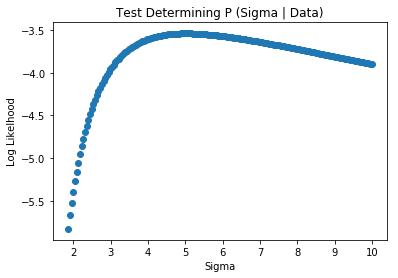

In [85]:
from matplotlib import pyplot as plt
truncate = 0
plt.scatter(sigma_range[truncate:], summed_prob[truncate:])
plt.ylabel("Log Likelhood")
plt.xlabel("Sigma")
plt.title("Test Determining P (Sigma | Data)")